<img src="logo.png" alt="Logo IFNMG" width="200">
<h1 style="text-align:center;"> Tópicos em IC: Análise exploratória de dados.</h1>
<p>Equipe: David Jansen, Iarah Gonçalves de Almeida, Paulo Borges</p>


<h2> Introdução</h2>
<p> A análise de dados será feita sobre o 
<a href="http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29">Breast Cancer Wisconsin (Prognostic) Data Set.</a> A manipulação dos dados para análise será feita utilizando a linguagem Python no ambiente Jupyter.</p>

<h2> Informação dos Atributos </h2>

<p> 1) ID number </p>

<p> 2) Outcome (R = recur, N = nonrecur) </p>

<p> 3) Time (recurrence time if field 2 = R, disease-free time if field 2	= N) </p>

<p> 4-33) Ten real-valued features are computed for each cell nucleus: </p>

<ol>
    <li> radius (mean of distances from center to points on the perimeter) </li>
    <li> texture (standard deviation of gray-scale values) </li>
    <li> perimeter </li>
    <li> area </li>
	<li> smoothness (local variation in radius lengths) </li>
	<li> compactness (perimeter^2 / area - 1.0) </li>
	<li> concavity (severity of concave portions of the contour) </li>
	<li> concave points (number of concave portions of the contour) </li>
	<li> symmetry </li>
	<li> fractal dimension ("coastline approximation" - 1) </li>
</ol>

<p> Several of the papers listed above contain detailed descriptions of how these features are computed. </p>

<p>The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 4 is Mean Radius, field 14 is Radius SE, field 24 is Worst Radius. </p>

<p> Values for features 4-33 are recoded with four significant digits. <p>

<p> 34) Tumor size - diameter of the excised tumor in centimeters </p>
<p> 35) Lymph node status - number of positive axillary lymph nodes observed at time of surgery. </p>

<h2> Preparação do Ambiente Jupyter</h2>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

<h2> Importação dos dados através da URL de acesso</h2>

In [3]:
#URL onde se encontra a base de dados.
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'

#Nomeação das colunas.
names = ['id_number', 'outcome', 'time', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst', 'tumor_size', 'lymph_node_status']

#Leitura do arquivo para o formato csv.
wpbc = pd.read_csv(urlopen(UCI_data_URL), names=names)

#Mostrando resultado em forma de tabela (10 primeiros).
wpbc.head(10)

,id_number,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


<h2> Tratamento do Conjunto de Dados para análise</h2>

<p> O atributo 'outcome' está representado com um objeto string. Faremos um mapeamento do atributo para valores numéricos, onde N = 0 e R = 1. Isso ajuda na plotagem de gráficos e na aplicação de alguns modelos.</p>

In [4]:
#Mapeamento.
wpbc['outcome'] = wpbc['outcome'].map({'R':1, 'N':0})

#Visualização dos dados após o mapeamento.
wpbc.head(10)

,id_number,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
5,843786,1,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0
6,844359,0,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
7,844582,1,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10
8,844981,0,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1
9,845010,0,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20


<h2>Exploração de dados</h2>

<p> Algumas informações podem ser obtidadas através do arquivo <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names">wpbc.names</a>:</p>

<ul>
    <li> O atributo 'lymph_node_status' está ausente em 4 amostras.</li>
    <li> 151 amostras não apresentam recorrência('outcome' = 0), 47 apresentam recorrência('outcome' = 1).</li>
</ul>

<p> Dada a primeira informação na lista acima, iremos retirar essas 4 amostras de nossa análise. Além disso, iremos utilizar a coluna de 'id_number' em nossa exploração como índice.</p>

In [5]:
#Alterando o índice da coluna para o atributo 'id_number'
wpbc.set_index(['id_number'], inplace = True) 

#Retirando elementos onde a coluna 'lymph_node_status' tem valor '?'.
wpbc = wpbc[wpbc['lymph_node_status'] != '?']

#converte de str para float
wpbc['lymph_node_status'] = pd.to_numeric(wpbc['lymph_node_status'])

#Visualização após as modificações.
wpbc.head(10)

,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
id_number,,,,,,,,,,,,,,,,,,,,,
119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
843786,1,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,...,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
844582,1,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10
844981,0,119,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1
845010,0,76,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20


<p> Podemos ter mais algumas informações estatísticas do conjunto de dados, usando a função <b><i>describe</i></b>.</p>

In [6]:
#Estatísticas básicas de cada coluna da tabela.
wpbc.describe()

,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.237113,46.938144,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,...,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,0.426413,34.523646,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,...,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,0.000000,1.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,0.000000,14.250000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,...,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,0.000000,39.500000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,...,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,0.000000,73.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,1.000000,125.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


<h3> Exploração de Dados: Selecionando subconjunto de amostras</h3>

<p> Para o nosso estudo, iremos trabalhar com os valores médios para cada atributo do núcleo celular, e separar em dois grupos: amostras com recorrência e sem recorrência. A partir dessa seleção, poderemos comparar as médias, utilzar histogramas e boxplot.</p>

In [7]:
#Criando tabela com atributos 'mean'
wpbc_mean = wpbc
wpbc_mean = wpbc_mean.drop(['time', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst'], axis = 1)

<p> Podemos usar a função <b><i>describe</i></b> para ver as estatísticas das amostras separadas pelo atributo 'outcome'</p>

In [8]:
#descripe para amostras com recorrência
wpbc_mean[wpbc_mean['outcome'] == 0].describe()

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,tumor_size,lymph_node_status
count,148.0,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.0,17.113716,22.469459,112.819122,934.005405,0.102685,0.142963,0.154683,0.084848,0.194450,0.063230,2.679730,2.695946
std,0.0,3.063699,4.513809,20.638927,331.980842,0.013272,0.052963,0.073583,0.033714,0.029314,0.007524,1.893237,5.215960
min,0.0,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050960,0.400000,0.000000
25%,0.0,14.867500,19.367500,97.365000,681.400000,0.093860,0.109275,0.103525,0.061410,0.174825,0.056860,1.500000,0.000000
50%,0.0,16.900000,21.870000,110.250000,897.150000,0.101700,0.131100,0.147350,0.084855,0.189500,0.062180,2.000000,0.000000
75%,0.0,19.412500,25.097500,128.200000,1163.750000,0.110925,0.174825,0.198900,0.098267,0.212075,0.067535,3.050000,2.000000
max,0.0,24.630000,39.280000,166.200000,1841.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,10.000000,27.000000


In [9]:
#descripe para amostras sem recorrência
wpbc_mean[wpbc_mean['outcome'] == 1].describe()

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,tumor_size,lymph_node_status
count,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.0,18.330870,21.758913,121.095217,1081.980435,0.103063,0.141606,0.161542,0.093113,0.187848,0.061176,3.471739,4.869565
std,0.0,3.365566,3.695717,22.910195,397.264721,0.010302,0.040692,0.062138,0.034361,0.021085,0.006298,2.029851,6.017045
min,1.0,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,0.142400,0.050250,0.400000,0.000000
25%,1.0,15.657500,19.067500,103.900000,799.875000,0.094077,0.113375,0.111025,0.067740,0.172175,0.056365,2.350000,0.250000
50%,1.0,18.825000,21.365000,123.550000,1090.000000,0.103350,0.133350,0.164700,0.088235,0.185750,0.060795,3.000000,2.000000
75%,1.0,20.262500,24.162500,133.425000,1278.500000,0.111875,0.166000,0.207525,0.108375,0.198900,0.065240,4.000000,7.000000
max,1.0,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,0.235600,0.074510,10.000000,27.000000


<h3>Exploração de Dados: Recursos visuais</h3>

<p> Mesmo com a função <b><i>describe</i></b>, não é simples perceber a diferença de cada atributo entre os dois grupos. Para nos auxiliar, usaremos a plotagem em histogramas e boxplot.<p>

In [10]:
#Criando lista de atributos de interesse. Nesse caso, retiramos o atributo 'outcome'
atributos_mean= list(wpbc_mean.columns[1:])

<h4> Histograma</h4>

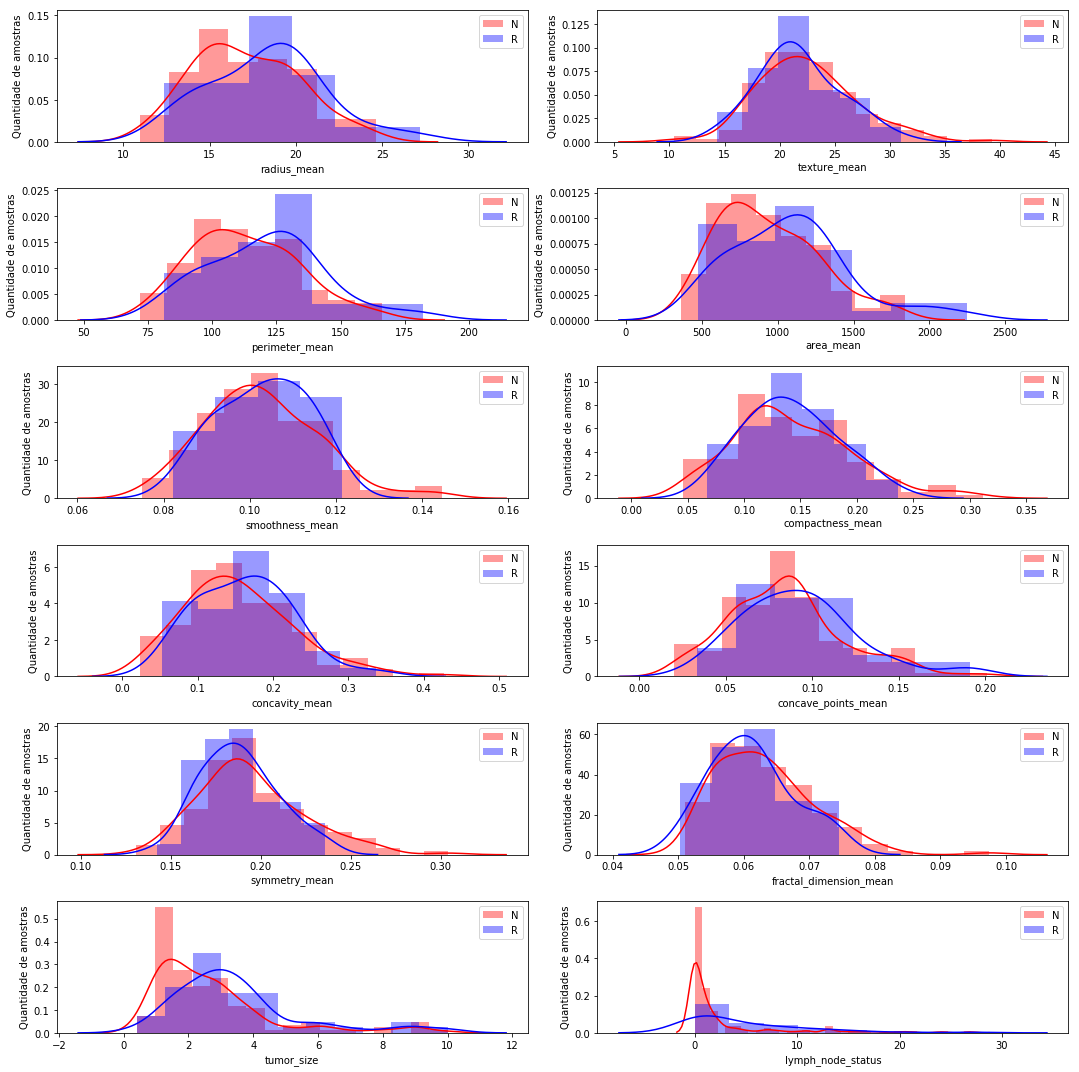

In [12]:
import warnings
#warnings.filterwarnings('ignore',  category=DeprecationWarning) #ignorar warnings de deprecation

plt.figure(figsize=(15,15))
for i, atributo in enumerate(atributos_mean):
    rows = int(len(atributos_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(wpbc_mean[wpbc_mean['outcome']==0][atributo], color='red', label='N');
    sns.distplot(wpbc_mean[wpbc_mean['outcome']==1][atributo], color='blue', label='R');
    
    plt.legend(loc='upper right')
    plt.ylabel('Quantidade de amostras')

plt.tight_layout()
plt.show()

<h4> Boxplot</h4>

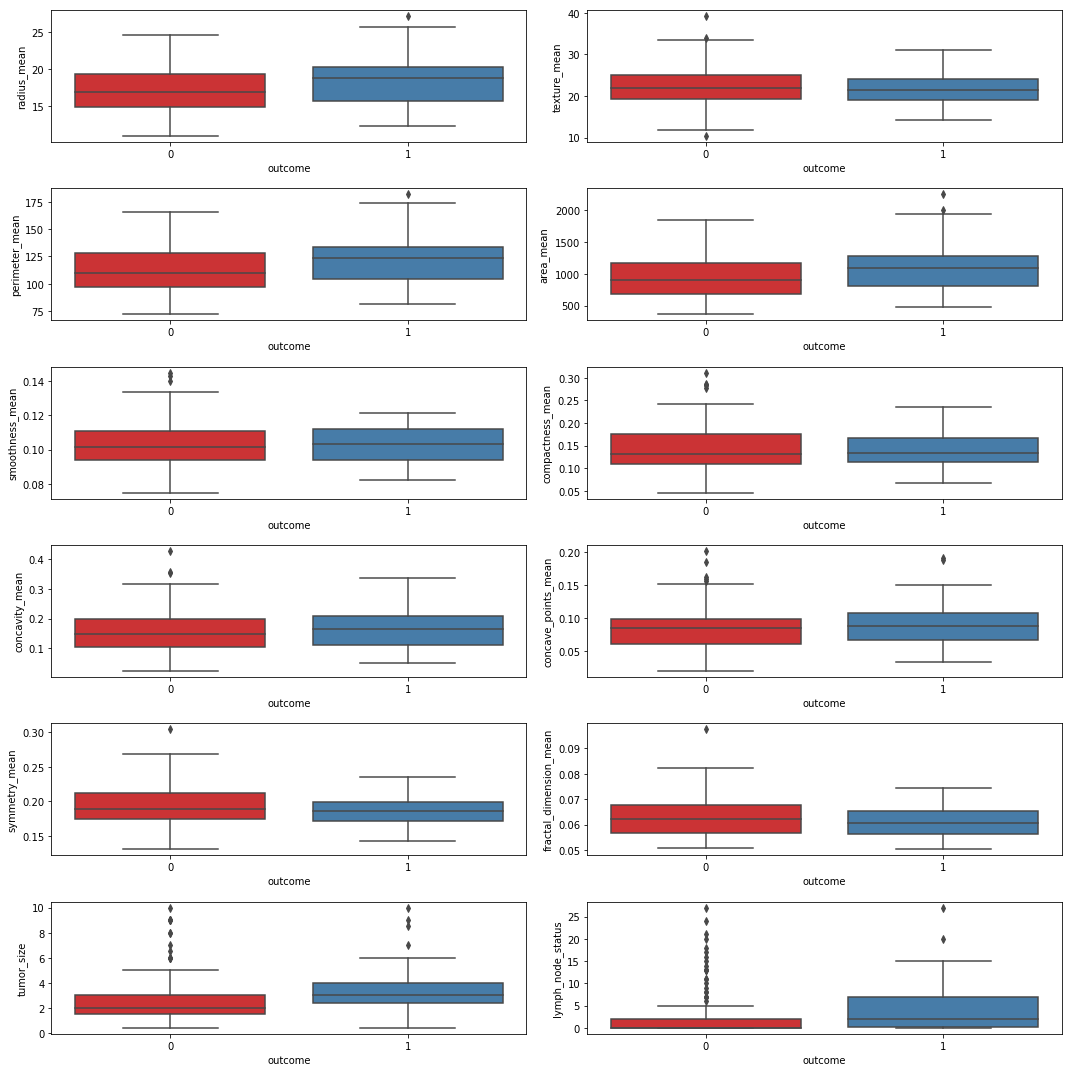

In [13]:
plt.figure(figsize=(15,15))
for i, atributo in enumerate(atributos_mean):
    rows = int(len(atributos_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='outcome', y=atributo, data=wpbc_mean, palette="Set1")

plt.tight_layout()
plt.show()

<p> Podemos nota que a maior diferença entre as médias aparece no atributo 'area_mean'. </p>

In [14]:
wpbc_mean['area_mean'].groupby(wpbc_mean['outcome']).describe()

,count,mean,std,min,25%,50%,75%,max
outcome,,,,,,,,
0,148.0,934.005405,331.980842,361.6,681.400,897.15,1163.75,1841.0
1,46.0,1081.980435,397.264721,477.4,799.875,1090.00,1278.50,2250.0


<h3>Exploração de Dados: Teste de Suposições</h3>

<p> A saída do teste é o valor W e o <b><i>p-value</i></b>. Considera-se que a suposição não é violada quando o <b><i>p-value</i></b> é maior que alpha, normalmente <b><i>0.05</i></b>.</p>

In [15]:
#teste das suposições
import scipy.stats as stats

tabela = pd.DataFrame(wpbc_mean, columns=['outcome', 'area_mean'])

print(stats.shapiro(tabela.area_mean.loc[tabela.outcome == 0]))

print(stats.shapiro(tabela.area_mean.loc[tabela.outcome == 1]))

(0.9626584649085999, 0.0004801375907845795)
(0.9418953657150269, 0.023047123104333878)


<p> Note que a condição foi violada </p>

In [16]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(tabela.area_mean.loc[tabela.outcome == 0], tabela.area_mean.loc[tabela.outcome == 1])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(tabela.area_mean.loc[tabela.outcome == 0], tabela.area_mean.loc[tabela.outcome == 1])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(tabela.area_mean.loc[tabela.outcome == 0], tabela.area_mean.loc[tabela.outcome == 1])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=2658.000, p=0.013
Distribução diferente
Kruskal-Wallis: Estatisticas=5.030, p=0.025
Distribução diferente
Anova: Estatisticas=6.331, p=0.013
Distribução diferente


In [26]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = wpbc.iloc[0:150, 2:]
Y = wpbc.iloc[0:150,0:1]
names = wpbc.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y.values.ravel())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.0606, 'symmetry_mean'), (0.0593, 'concave_points_mean'), (0.0536, 'radius_worst'), (0.0486, 'radius_mean'), (0.0467, 'compactness_worst'), (0.0438, 'area_mean'), (0.0429, 'fractal_dimension_se'), (0.0422, 'radius_se'), (0.0398, 'perimeter_worst'), (0.0396, 'texture_se'), (0.039, 'fractal_dimension_mean'), (0.0379, 'concavity_se'), (0.0346, 'area_worst'), (0.033, 'texture_worst'), (0.0315, 'fractal_dimension_worst'), (0.0301, 'concavity_worst'), (0.0296, 'concave_points_se'), (0.0295, 'smoothness_se'), (0.0262, 'perimeter_mean'), (0.0248, 'symmetry_se'), (0.0246, 'perimeter_se'), (0.0235, 'area_se'), (0.0222, 'concave_points_worst'), (0.0205, 'smoothness_mean'), (0.0198, 'compactness_se'), (0.0163, 'outcome'), (0.0158, 'texture_mean'), (0.0157, 'concavity_mean'), (0.0148, 'compactness_mean'), (0.0129, 'time'), (0.0122, 'smoothness_worst'), (0.0086, 'symmetry_worst')]


In [25]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(X)

# Inspect the shape of `reduced_data`
reduced_data.shape

# print out the reduced data
#print(reduced_data)

(150, 2)

In [20]:
print(reduced_data)

[[ 8.51417192e+01 -3.80764417e+01]
 [ 5.89614347e+02  2.63693415e+02]
 [ 7.09615807e+02 -9.57919602e+01]
 [-9.82406183e+02  7.41117655e+01]
 [ 3.48488120e+02 -2.15423697e+02]
 [-7.80600036e+02  5.50492723e+01]
 [-6.00248749e+02  7.15126264e+01]
 [-7.67095272e+02  4.30664520e+01]
 [-8.13490611e+02  6.72750707e+01]
 [-2.71756534e+02  6.12147011e+00]
 [-1.49951233e+02  9.49651099e+01]
 [-5.16578888e+02 -1.16961141e+02]
 [-5.20226049e+02  2.38618683e+01]
 [-3.38396437e+02  9.87694108e+01]
 [-1.27113241e+02  8.72899689e+01]
 [-4.64191545e+02  2.92431621e+00]
 [ 1.30309645e+03  2.08854601e+02]
 [ 7.08252144e+02  4.44108957e+02]
 [ 5.93800264e+01  6.21600057e+01]
 [-5.67850929e+02  1.26569838e+01]
 [ 9.79753661e+01 -1.24494750e+02]
 [-2.00022089e+02  1.22163898e+02]
 [-1.25248658e+02 -9.20905500e+01]
 [-6.76054520e+02  1.86840019e+02]
 [-5.13799677e+01  1.47763955e+01]
 [ 4.86371900e+02  1.96568094e+01]
 [-1.70805107e+02  5.27154373e+01]
 [-6.58093554e+02 -2.53444972e+01]
 [-7.09594956e+02 -1

In [69]:
type(Y)
Y['outcome'] = Y['outcome'].astype("category")
print(Y['outcome'])

id_number
119513     0
8423       0
842517     0
843483     0
843584     1
843786     1
844582     1
844981     0
845010     0
845636     0
846100     0
846381     0
847990     1
848406     0
848620     1
8511133    0
851509     1
852552     0
852631     0
852763     0
852781     0
852973     0
853201     0
853612     0
853826     0
854002     0
854039     0
854268     0
855133     0
855138     0
          ..
894618     0
895100     0
89539      1
897428     0
897630     0
89812      1
898431     1
899667     0
899987     1
9010018    1
901088     0
9011494    0
9012000    1
901288     0
9013838    0
90291      0
90312      0
903516     0
905241     0
905680     0
906023     1
907607     0
908194     1
908445     0
908489     1
909445     0
9110127    0
9110732    1
9111573    0
9111805    1
Name: outcome, Length: 150, dtype: category
Categories (2, int64): [0, 1]


In [72]:
labels,levels = pd.factorize(Y['outcome'])
print(labels)

[0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1]


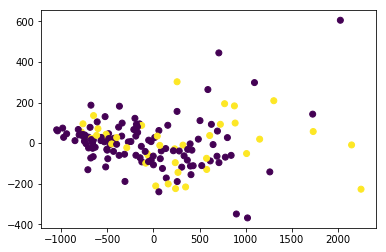

In [73]:
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap = 'viridis')

plt.show()

In [48]:
print(Y)

           outcome
id_number         
119513           0
8423             0
842517           0
843483           0
843584           1
843786           1
844582           1
844981           0
845010           0
845636           0
846100           0
846381           0
847990           1
848406           0
848620           1
8511133          0
851509           1
852552           0
852631           0
852763           0
852781           0
852973           0
853201           0
853612           0
853826           0
854002           0
854039           0
854268           0
855133           0
855138           0
...            ...
894618           0
895100           0
89539            1
897428           0
897630           0
89812            1
898431           1
899667           0
899987           1
9010018          1
901088           0
9011494          0
9012000          1
901288           0
9013838          0
90291            0
90312            0
903516           0
905241           0
905680      